**0. Importation des librairies**

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

**1. Dataset**

In [2]:
X, y = make_blobs(n_samples=100, n_features=2, centers=2, random_state=0)
y = y.reshape((y.shape[0], 1))
X


array([[ 4.21850347,  2.23419161],
       [ 0.90779887,  0.45984362],
       [-0.27652528,  5.08127768],
       [ 0.08848433,  2.32299086],
       [ 3.24329731,  1.21460627],
       [ 1.44193252,  2.76754364],
       [ 1.0220286 ,  4.11660348],
       [ 3.97820955,  2.37817845],
       [ 0.58894326,  4.00148458],
       [ 1.25185786,  0.20811388],
       [ 0.62835793,  4.4601363 ],
       [ 1.68608568,  0.65828448],
       [ 1.18454506,  5.28042636],
       [ 0.06897171,  4.35573272],
       [ 1.78726415,  1.70012006],
       [ 4.4384123 ,  1.84214315],
       [ 3.18190344, -0.18226785],
       [ 0.30380963,  3.94423417],
       [ 0.73936011,  0.43607906],
       [ 1.28535145,  1.43691285],
       [ 1.1312175 ,  4.68194985],
       [ 0.66471755,  4.35995267],
       [ 1.31570453,  2.44067826],
       [-0.18887976,  5.20461381],
       [ 2.57854418,  0.72611733],
       [ 0.87305123,  4.71438583],
       [ 1.3105127 ,  0.07122512],
       [ 0.9867701 ,  6.08965782],
       [ 1.42013331,

Q1: Afficher Les dimensions de X et de y

In [4]:
print("X shape:",X.shape);

X shape: (100, 2)


In [5]:
print("y shape:",y.shape);

y shape: (100, 1)


Q2: Visualiser le nuage des points de X1 et X2

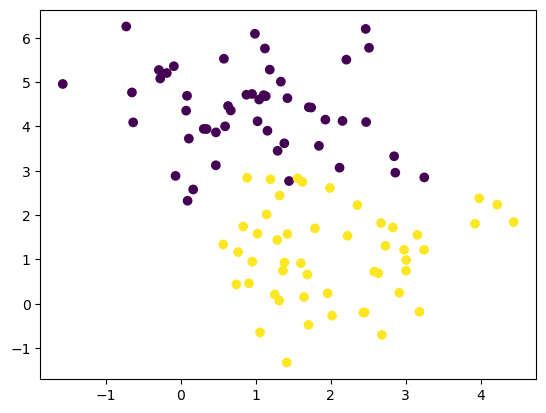

In [14]:
plt.figure();
plt.scatter(X[:,0],X[:,1], c=y);
plt.show();

**2. Fonctions du modele**

Q3: Ecrire une fonction d'initilisation des paramètres w et b

np.random.randn(a, b) génère un tableau de taille (a, b)

In [16]:
def initialiser():
    w=np.random.randn(2,1);
    b=np.random.randn(1,1);
    return w,b
    

In [9]:
w,b=initialiser();
print(w);
print(b);

[[-0.00281495]
 [-0.01531668]]
0.0


Q4: Ecrire une fonction qui implémente la fonction d'aggrégation et d'activation appliquées sur les variables d'entrées

dot(X, W)

Le produit matriciel np.dot(X, W) fait la combinaison linéaire entre les entrées et les poids :

𝑍=𝑋⋅𝑊

Concrètement :𝑧𝑖=𝑥𝑖1⋅𝑤1+𝑥𝑖2⋅𝑤2 

fonction seuil: 
A = np.where(Z >= 0, 1, 0)
est le cœur de la fonction d’activation à seuil dans un perceptron.

Pour chaque élément de Z :

si Z ≥ 0, alors mets 1

sinon, mets 0

In [11]:
def setep(X,W,b):
    Z=np.dot(X,W)+b ;
    A=np.where(Z>=0,1,0) ;
    return A

Q5: Ecrire la fonction L pour calculer l'erreur entre les valeurs estimées par le modèle et les valeurs réelles de l'échantillon

In [12]:
def errur(y,A):
    return y-A ;

Q7: Ecrire la fonction update qui permet de mettre à jour les poids

 # mise à jour des poids et du biais
        W = W + learning_rate * Li * xi   # mise à jour proportionnelle à l'echantillon xi
        b = b + learning_rate * Li        # mise à jour du biais

faites attention aux dimensions des variables!

In [13]:
def update(W,b,X,y,A,alpha):
    m=X.shape[0];
    err=y-A;
    W=W+ (alpha*np.dot(X,err));
    b=b+(alpha*np.sum(err));
    return W,b

Q8: Ecrire la fonction principale d'un neurone artificielle qui doit procéder comme suit:

Initialisation des poids
Appliquer le modèle sur les données X
Calculer les gradients de la fonction log loss
Mettre à jour les poids
Retourner à 2 jusqu'à n_itérations

In [ ]:
def per(X,y,alpha,n):
    nb=2;
    w,b=initialiser(nb);
    c=[];
    for i in range(n):
        dw,db,c=setep(X,y,W,b);
        w,b=update(W,b,dw,db,alpha);
    

Maintenant, le tour est joué, appliquer votre programme de neurone artificielle sur vos données X,y définis dans le dataset pour déterminer les coefficients Wi, b

In [1]:
def neurone(X, y, alpha, n_iterations):
    n_features = X.shape[1]
    W, b = initialiser(n_features)

    for i in range(n_iterations):
        A = modele(X, W, b)            # étape 2
        dW, db = gradients(X, y, A)    # étape 3
        W, b = update(W, b, dW, db, alpha)  # étape 4

    return W, b


Q9. On souhaite afficher l'évolution de la fonction L au fur à mesure de l'apprentissage (d'une itération à une autre), pour ce faire, on vous demande d'apporter les modifications nécessaires au niveau de la fonction artificial_neuron

Loss est une liste vide au départ :Loss = []

Puis, à chaque itération d’apprentissage, tu calcules la perte et tu la ajoutes :

Loss.append(Erreur(A, y))

 plt.plot(Loss)

 sert à visualiser l’évolution de la perte (Loss) pendant l’entraînement de ton neurone.

In [ ]:
def Erreur(A, y):
    m = y.shape[0]
    return -(1/m) * np.sum(y*np.log(A) + (1-y)*np.log(1-A))


Q10. On souhaite définir une fonction de prédiction qui détermine pour chaque entrée la classe correspondante:


In [ ]:
def predict(X, W, b):
    A = modele(X, W, b)          # probabilités
    y_pred = np.where(A >= 0.5, 1, 0)   # classes
    return y_pred


Q11. Moyennant la méthode accuracy_score de la bibliothèque Siktlearn, calculer le taux d'accuracy de votre modèle

In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:

y_pred = predict(X, W, b)   # prédictions du modèle
accuracy = accuracy_score(y, y_pred)

print("Accuracy :", accuracy)


**3. Frontiere de décision**


Q12. Visualiser le nuage de points des échantillons ainsi que la droite de la frontière entre les deux classes.

np.linspace(a, b, n) → crée un vecteur de n points entre a et b inclus.

In [ ]:
fig, ax = plt.subplots(figsize=(9, 6))
ax.scatter(X[:,0], X[:, 1], c=y, cmap='summer')

x1 = np.linspace(-1, 4, 100)
x2 = ( - W[0] * x1 - b) / W[1]

ax.plot(x1, x2, c='orange', lw=3)

In [ ]:
fig, ax = plt.subplots(figsize=(9, 6))

# Nuage de points coloré selon la classe
ax.scatter(X[:,0], X[:,1], c=y, cmap='summer')

# Frontière de décision
x1 = np.linspace(-1, 4, 100)
x2 = ( - W[0] * x1 - b ) / W[1]

ax.plot(x1, x2, c='orange', lw=3)
ax.set_xlabel("X1")
ax.set_ylabel("X2")
ax.set_title("Nuage de points et frontière de décision")
plt.show()
